In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

trainset_path = r"/content/drive/MyDrive/CNN/trainset-20240603T081249Z-001/trainset"
testset_path = r"/content/drive/MyDrive/CNN/testset-20240603T081248Z-001/testset"

x_train = train_datagen.flow_from_directory(
    trainset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)

x_test = test_datagen.flow_from_directory(
    testset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)
print(x_train.class_indices)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CNN/trainset-20240603T081249Z-001/trainset'

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.add(Dense(units=128,activation="relu"))

In [ ]:
model.add(Dense(units=5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3937925 (15.02 MB)
Trainable params: 3937925 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train,steps_per_epoch=55,epochs=1,validation_data=x_test,validation_steps=20)

47/55 [========================>.....] - ETA: 58s - loss: 1.8109 - accuracy: 0.2809 

55/55 [==============================] - 508s 9s/step - loss: 1.8109 - accuracy: 0.2809 - val_loss: 1.3269 - val_accuracy: 0.4656


In [ ]:
model.save("animal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**TESTING**

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("animal.h5")

In [ ]:
from keras.preprocessing import image
width = 224
height = 224
img_path = "/content/drive/MyDrive/CNN/testset-20240603T081248Z-001/testset/rats/9k_ (16).jpeg"
img = image.load_img(img_path, target_size=(width, height))


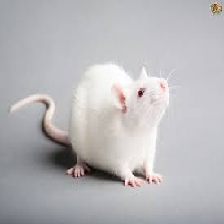

In [ ]:
x=image.img_to_array(img)
img

In [ ]:
x

array([[[159., 162., 167.],
        [159., 162., 167.],
        [160., 163., 168.],
        ...,
        [171., 184., 193.],
        [174., 175., 177.],
        [171., 172., 174.]],

       [[159., 162., 167.],
        [159., 162., 167.],
        [160., 163., 168.],
        ...,
        [159., 166., 174.],
        [174., 175., 177.],
        [171., 172., 174.]],

       [[159., 162., 167.],
        [159., 162., 167.],
        [160., 163., 168.],
        ...,
        [159., 153., 155.],
        [175., 176., 178.],
        [172., 173., 175.]],

       ...,

       [[108., 111., 118.],
        [108., 111., 118.],
        [108., 111., 118.],
        ...,
        [153., 156., 163.],
        [153., 156., 163.],
        [153., 156., 163.]],

       [[105., 108., 115.],
        [105., 108., 115.],
        [105., 108., 115.],
        ...,
        [150., 153., 160.],
        [149., 152., 159.],
        [149., 152., 159.]],

       [[102., 105., 112.],
        [102., 105., 112.],
        [103., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
from keras.preprocessing import image
import numpy as np
target_size = (64, 64)
img = image.load_img(img_path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
y = model.predict(x)
pred = np.argmax(y, axis=1)

1/1 [==============================] - 0s 95ms/step


In [ ]:
pred

array([4])

In [ ]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'racoons': 3, 'rats': 4}

In [ ]:
index=['bears', 'crows', 'elephants', 'racoons', 'rats']
result=str(index[pred[0]])

In [ ]:
result

'rats'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0
